In [1]:
import numpy as np
import CEvNS

In [2]:
help(CEvNS)

Help on module CEvNS:

NAME
    CEvNS - CEvNS.py - Version 1 - 25/01/2017

FILE
    /Users/bradkav/Projects/RicochetNP/code/CEvNS.py

DESCRIPTION
    Summary: 
    Code for calculating differential cross section
    for Coherent Elastic Neutrino Nucleus Scattering (CEvNS).
    
    Cross sections taken from arXiv:1604.01025
    
    Author: Bradley J Kavanagh
    Please report any problems to: bradkav@gmail.com

FUNCTIONS
    ERmax(E_nu, A)
        #Maximum nuclear recoil energy (in keV)
    
    HelmFormFactor(E, A)
        #Helm Form Factor
    
    xsec_CEvNS(E_R, E_nu, A, Z, g_med=0.0, m_med=1000.0)
        Calculates the differential cross section for
        Coherent Elastic Neutrino-Nucleus Scattering.
        
        Parameters
        ----------
        E_R : float
            Recoil energy (in keV)
        E_nu : float
            Neutrino energy (in MeV)
        A   : int
            Mass number of target nucleus
        Z   : int
            Atomic number of target nucleus

In [4]:
import matplotlib.pyplot as pl

Max. Ge recoil energy (E_nu = 3 MeV):  0.26468447405  keV


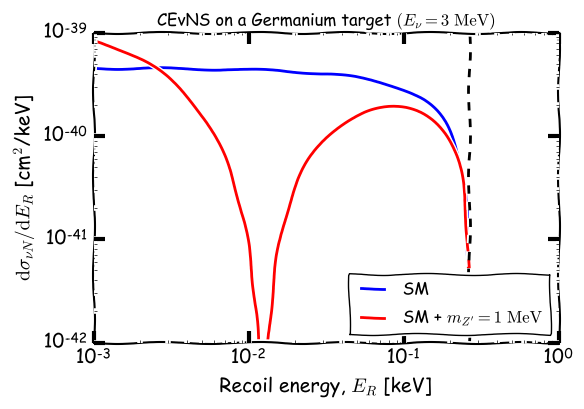

In [17]:
#Specify a single neutrino energy (I don't have the spectrum to hand)
E_nu = 3 #MeV

#Specify a nucleus
A_Ge = 73
Z_Ge = 32

#Calculate recoil spectrum
E_R = np.logspace(-3,0,500)
dsigdE = CEvNS.xsec_CEvNS(E_R, E_nu, A_Ge, Z_Ge)

#Calculate recoil spectrum including New Physics (a new 1 MeV mediator)
dsigdE_NP = CEvNS.xsec_CEvNS(E_R, E_nu, A_Ge, Z_Ge, g_med = 2e-6, m_med = 1.0)

#Maximum recoil energy
Emax = CEvNS.ERmax(E_nu, A_Ge)
print "Max. Ge recoil energy (E_nu = 3 MeV): ", Emax, " keV"

#Do some plotting 
#using the only plotting style anyone should ever use...
pl.xkcd()

pl.figure()
pl.loglog(E_R, dsigdE, label="SM")
pl.loglog(E_R, dsigdE_NP, label=r"SM + $m_{Z'} = 1\,\, \mathrm{MeV}$")

pl.axvline(Emax, color='k', linestyle='--')

pl.ylim(1e-42, 1e-39)

pl.legend(fontsize=12.0, loc="best")

pl.title(r"CEvNS on a Germanium target $(E_\nu = 3 \,\,\mathrm{MeV})$", fontsize=12)
pl.xlabel(r"Recoil energy, $E_R$ [keV]")
pl.ylabel(r"$\mathrm{d}\sigma_{\nu N}/\mathrm{d}E_R$ [cm$^2$/keV]")
pl.show()
